In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
from scipy.io import loadmat
data = loadmat('../data/Cr2_4000.mat')
E = data['E']

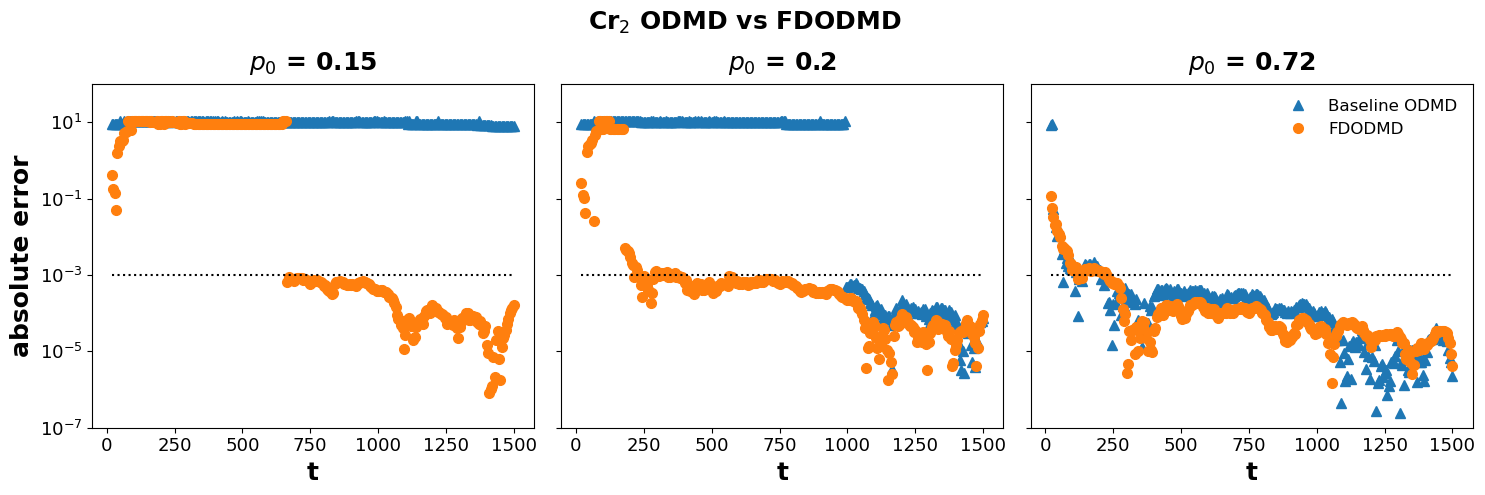

In [3]:
# Define overlap values
overlap_values = [0.15, 0.2, 0.72]

# Define colors for methods
method_colors = {'baseline': 'C0', 'denoised': 'C1'}  

# Define markers for tolerance values
tol_markers = {0.8: 'o', 0.1: '^'}

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, overlap in enumerate(overlap_values):
    # Load baseline and denoised data
    baseline_file = f"./figsdata/Cr2_baseline_odmd_noise=0.1_Tmax=1500_overlap={overlap}_dt=1.0_real_ODMD.npy"
    denoised_file = f"./figsdata/Cr2_fourier_denoised_odmd_6_stacked_noise=0.1_Tmax=1500_overlap={overlap}_dt=1.0_tol=0.8-0.1_real_ODMD.npy"
    
    baseline_data = np.load(baseline_file).T  # Shape (2, 1500)
    denoised_data = np.load(denoised_file).T  # Shape (2, 1500)

    time = np.arange(20, 1501, 5)  # Time axis
    
    for j, tol in enumerate([0.1]):
       
        fillstyle = 'full'
        alpha = 1.0
        markersize = 7
        label_baseline = 'Baseline ODMD' if i == 2 else ""
        if overlap == 0.2:    
            axes[i].semilogy(time, baseline_data[:, 2], linestyle='', fillstyle=fillstyle, marker=tol_markers[tol], 
                             color=method_colors['baseline'], label=label_baseline,
                             markersize=markersize, linewidth=1, alpha=alpha)
        else:
            axes[i].semilogy(time, baseline_data[:, 1], linestyle='', fillstyle=fillstyle, marker=tol_markers[tol], 
                             color=method_colors['baseline'], label=label_baseline,
                             markersize=markersize, linewidth=1, alpha=alpha)
        
        # Plot denoised (stacking) data with legend label only on the rightmost plot
        label_denoised = 'FDODMD' if i == 2 else ""
        axes[i].semilogy(time, denoised_data[:, 1], linestyle='', fillstyle=fillstyle, marker='o', 
                         color=method_colors['denoised'], label=label_denoised,
                         markersize=markersize, linewidth=1, alpha=alpha)
    
    # Formatting for each subplot
    axes[i].set_title(r"$p_0$ = " + str(overlap), fontsize=18, fontweight='bold', pad=10)
    axes[i].set_xlabel("t", fontsize=18, fontweight='bold')
    axes[i].tick_params(axis='both', which='major', labelsize=13)
    axes[i].plot([time[0], time[-1]], [1e-3, 1e-3], 'k:')

# Set common y-label on the first subplot
axes[0].set_ylabel("absolute error", fontsize=18, fontweight='bold')

# Add the legend to only the rightmost subplot
axes[2].legend(frameon=False, loc='upper right', fontsize=12)

plt.ylim([1e-7, 1e2])
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.suptitle(r'Cr$_2$ ODMD vs FDODMD', fontsize=18, fontweight='bold')
#plt.savefig('total_cr2_results_overlap_tol_stacking_vs_nostacking_tol=0.1_styled.png', bbox_inches='tight')
plt.show()


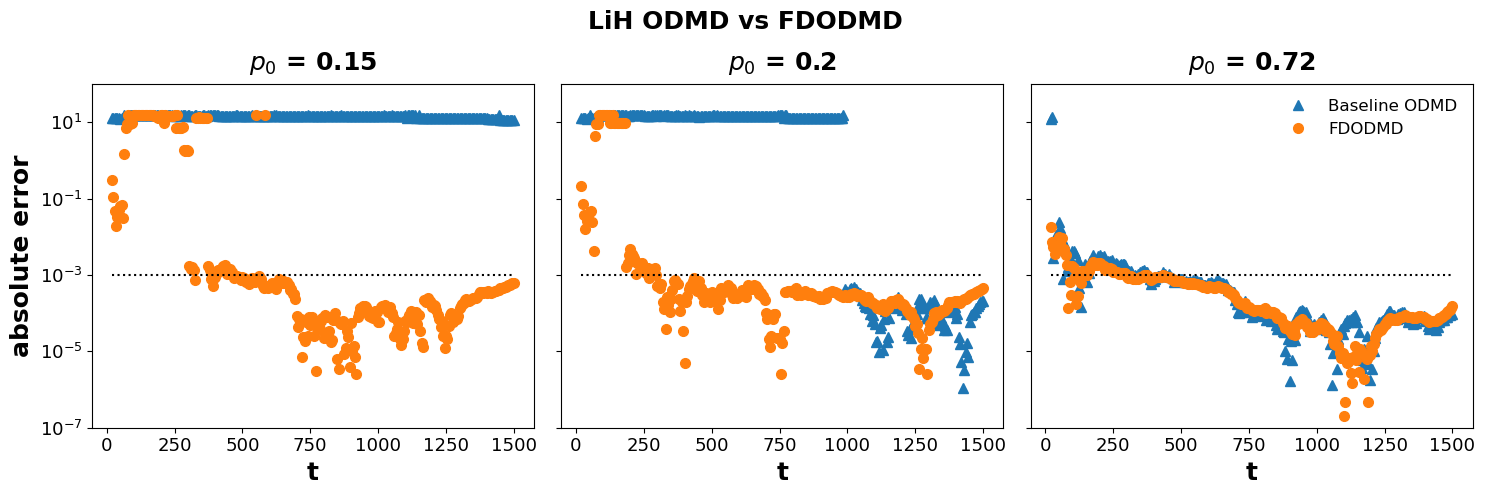

In [4]:
# Define overlap values
overlap_values = [0.15, 0.2, 0.72]

# Define colors for methods
method_colors = {'baseline': 'C0', 'denoised': 'C1'}  

# Define markers for tolerance values
tol_markers = {0.8: 'o', 0.1: '^'}

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, overlap in enumerate(overlap_values):
    # Load baseline and denoised data
    baseline_file = f"./figsdata/LiH_baseline_odmd_noise=0.1_Tmax=1500_overlap={overlap}_dt=1.0_real_ODMD.npy"
    denoised_file = f"./figsdata/LiH_fourier_denoised_odmd_6_stacked_denoised_noise=0.1_Tmax=1500_overlap={overlap}_dt=1.0_tol=0.1-0.1_real_ODMD.npy"
    
    baseline_data = np.load(baseline_file).T  # Shape (2, 1500)
    denoised_data = np.load(denoised_file).T  # Shape (2, 1500)

    time = np.arange(20, 1501, 5)  # Time axis
    

    for j, tol in enumerate([0.1]):
        fillstyle = 'full'
        alpha = 1.0
        markersize = 7
        
    
        label_baseline = 'Baseline ODMD' if i == 2 else ""
        axes[i].semilogy(time, baseline_data[:, 0], linestyle='', fillstyle=fillstyle, marker=tol_markers[tol], 
                         color=method_colors['baseline'], label=label_baseline,
                         markersize=markersize, linewidth=1, alpha=alpha)
        
        label_denoised = 'FDODMD' if i == 2 else ""
        axes[i].semilogy(time, denoised_data[:, 0], linestyle='', fillstyle=fillstyle, marker='o', 
                         color=method_colors['denoised'], label=label_denoised,
                         markersize=markersize, linewidth=1, alpha=alpha)
    
    # Formatting for each subplot
    axes[i].set_title(r"$p_0$ = " + str(overlap), fontsize=18, fontweight='bold', pad=10)
    axes[i].set_xlabel("t", fontsize=18, fontweight='bold')
    axes[i].tick_params(axis='both', which='major', labelsize=13)
    axes[i].plot([time[0], time[-1]], [1e-3, 1e-3], 'k:')

# Set common y-label on the first subplot
axes[0].set_ylabel("absolute error", fontsize=18, fontweight='bold')

# Add the legend to only the rightmost subplot
axes[2].legend(frameon=False, loc='upper right', fontsize=12)

plt.ylim([1e-7, 1e2])
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.suptitle(r'LiH ODMD vs FDODMD', fontsize=18, fontweight='bold')
#plt.savefig('total_LiH_results_overlap_tol_stacking_vs_nostacking_tol=0.1_styled.pdf', bbox_inches='tight')
plt.show()


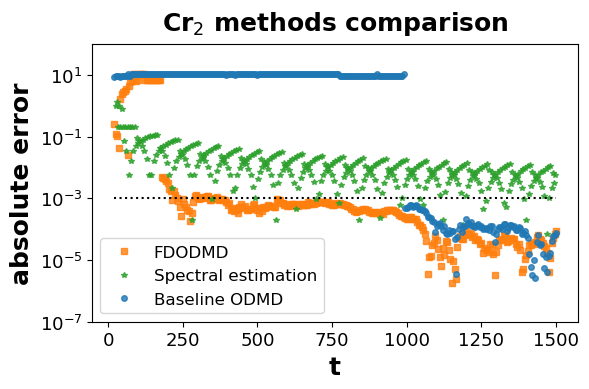

In [5]:
# Define file paths
baseline_file = "./figsdata/Cr2_baseline_odmd_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_real_ODMD.npy"
denoised_file = "./figsdata/Cr2_fourier_denoised_odmd_6_stacked_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_tol=0.8-0.1_real_ODMD.npy"
se_file = "./figsdata/Cr2_FFT_zero_padding_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_padding=0_ff_left_right_absolute_errors_real_dt=1.0odd_symmetry.npy"
zp_file = "./figsdata/Cr2_FFT_zero_padding_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_padding=32_ff_left_right_absolute_errors_real_dt=1.0odd_symmetry.npy"

# Load data
baseline_data = np.load(baseline_file).T  # Shape (2, 1500)
denoised_data = np.load(denoised_file).T  # Shape (2, 1500)
se_data = np.load(se_file)  
zp_data = np.load(zp_file)

# Define time axes
time_baseline = np.arange(20, 1501, 5)
time_zp = np.arange(25, 1500 + 1, 2)

# Define markers and colors
method_styles = {
    "Baseline": {"color": "C0", "marker": "o"},
    "Stacking": {"color": "C1", "marker": "s"},
    "Spectral estimation": {"color": "C2", "marker": "*"},
    "Zero-padding": {"color": "C3", "marker": "^"},
}

fig, ax = plt.subplots(figsize=(6, 4))

# Plot FDODMD
ax.semilogy(time_baseline, denoised_data[:, 1], linestyle='', 
            marker=method_styles["Stacking"]["marker"], 
            color=method_styles["Stacking"]["color"], 
            label="FDODMD", markersize=4, linewidth=1, alpha=0.8)

# Plot Spectral estimation
ax.semilogy(time_zp[::2], se_data[::2], linestyle='', 
            marker=method_styles["Spectral estimation"]["marker"], 
            color=method_styles["Spectral estimation"]["color"], 
            label="Spectral estimation", markersize=4, linewidth=1, alpha=0.8)

# Optionally, plot Zero-padding spectral estimation (currently commented out)
# ax.semilogy(time_zp[::2], zp_data[::2], linestyle='', 
#             marker=method_styles["Zero-padding"]["marker"], 
#             color=method_styles["Zero-padding"]["color"], 
#             label="Zero-padding spectral estimation", markersize=4, linewidth=1, alpha=0.8)

# Plot Baseline ODMD
ax.semilogy(time_baseline, baseline_data[:, 2], linestyle='', 
            marker=method_styles["Baseline"]["marker"], 
            color=method_styles["Baseline"]["color"], 
            label="Baseline ODMD", markersize=4, linewidth=1, alpha=0.8)

# Chemical accuracy
ax.plot([time_baseline[0], time_baseline[-1]], [1e-3, 1e-3], 'k:')

# Formatting
ax.set_xlabel("t", fontsize=18, fontweight='bold')
ax.set_ylabel("absolute error", fontsize=18, fontweight='bold')
ax.set_title(r"Cr$_2$ methods comparison", fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major', labelsize=13)

# Place the legend outside the plot area
ax.legend(frameon=True, loc='lower left', fontsize=12)

plt.ylim([1e-7, 1e2])
plt.tight_layout()
#plt.savefig('total_method_comparison_cr2_noise=0.1_FDODMD_vs_ODMD_vs_specest_styled.pdf', bbox_inches='tight')
plt.show()

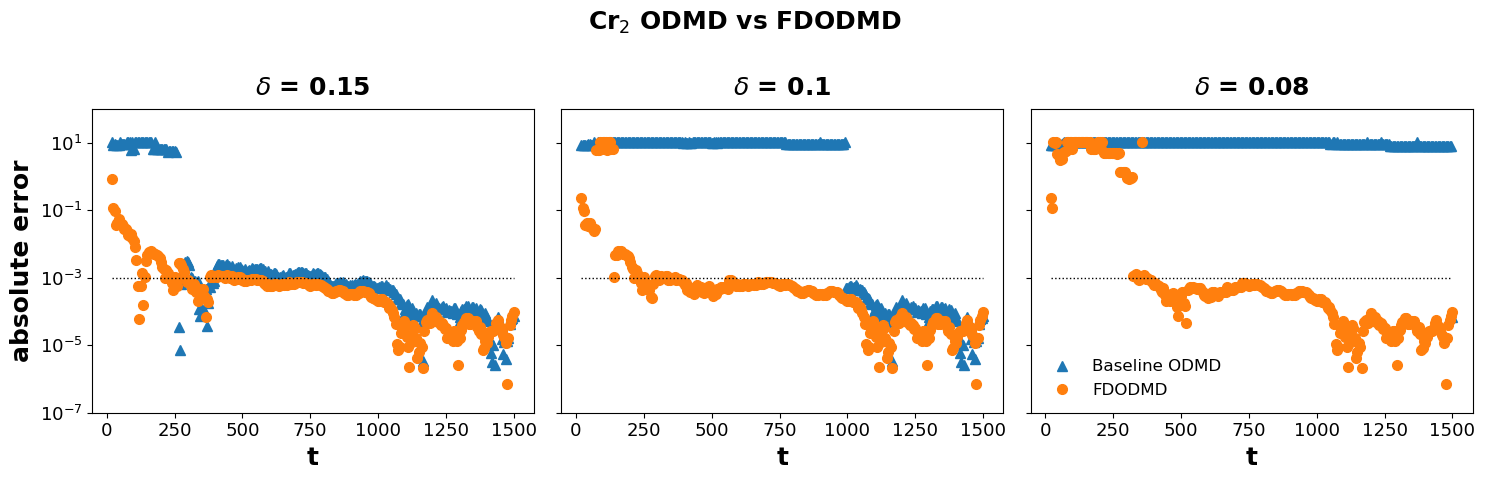

In [6]:
baseline_file = "./figsdata/Cr2_baseline_odmd_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_real_ODMD.npy"
denoised_file = "./figsdata/Cr2_fourier_denoised_odmd_6_stacked_denoised_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_tol=0.2-0.08_real_ODMD.npy"
baseline_data = np.load(baseline_file).T  
denoised_data = np.load(denoised_file).T  


# Define time axis and parameters
time = np.arange(20, 1501, 5)  
deltas = [0.15, 0.1, 0.08]       #will be used in subplot titles

# Define markers, colors, and style settings 
baseline_marker = '^'
denoised_marker = 'o'
baseline_color = 'C0'
denoised_color = 'C1'
markersize = 7
alpha = 1.0


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i in range(1, baseline_data.shape[1]):
    ax = axes[i-1]
    
    # Only add legend labels on the rightmost subplot (i==3)
    label_baseline = "Baseline ODMD" if i == 3 else ""
    label_denoised = "FDODMD" if i == 3 else ""
    
    # Plot baseline data 
    ax.semilogy(time, baseline_data[:, i],
                linestyle='', marker=baseline_marker,
                color=baseline_color,
                markersize=markersize, linewidth=1, alpha=alpha,
                label=label_baseline)
    
    # Plot denoised (FDODMD) data 
    ax.semilogy(time, denoised_data[:, i],
                linestyle='', marker=denoised_marker,
                color=denoised_color,
                markersize=markersize, linewidth=1, alpha=alpha,
                label=label_denoised)
    
    # Chemical accuracy plot
    ax.plot([time[0], time[-1]], [1e-3, 1e-3], 'k:', linewidth=1)
    
    # Set subplot title with the corresponding SVD delta value
    ax.set_title(r"$\delta$ = " + str(deltas[i-1]), fontsize=18, fontweight='bold', pad=10)
    ax.set_xlabel("t", fontsize=18, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=13)
    
    if i == 1:
        ax.set_ylabel("absolute error", fontsize=18, fontweight='bold')

# Add the legend only to the rightmost subplot
axes[2].legend(frameon=False, loc='lower left', fontsize=12)

# Set overall y-axis limits and figure title
plt.ylim([1e-7, 1e2])
plt.suptitle(r"Cr$_2$ ODMD vs FDODMD", fontsize=18, fontweight='bold', y=0.95)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.93])
#plt.savefig('Cr2_fdodmd_vs_odmd_noise=0.1_Tmax=1500_overlap=0.2_tol=0.2-0.08.pdf')
plt.show()

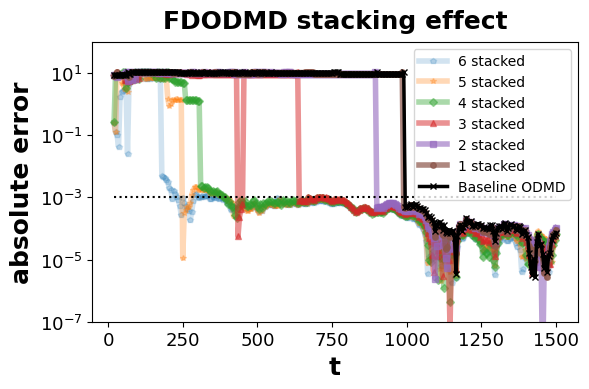

In [7]:
# Load baseline data and define time axis
baseline = np.load('./figsdata/Cr2_baseline_odmd_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_real_ODMD.npy')
time = np.arange(20, 1501, 5)
markers = ['o', 's', '^', 'D', '*', 'p']

fig, ax = plt.subplots(figsize=(6, 4))

# Plot each stacking ODMD version (from 6 stacked to 1 stacked)
for i in reversed(range(1, 7)):
    data = np.load(f'./figsdata/Cr2_fourier_denoised_odmd_{i}_stacked_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_tol=0.8-0.1_real_ODMD.npy')
    ax.semilogy(time, data[1, :],
                marker=markers[i - 1],
                linestyle='-',
                label=f'{i} stacked',
                alpha=0.8 - (0.1 * i),
                lw=4,
                markersize=4)

# Plot baseline data
ax.semilogy(time, baseline[2, :],
            marker='x',
            linestyle='-',
            color='black',
            markersize=4,
            lw=2.5,
            label='Baseline ODMD')

# Chemical accuracy
ax.plot([time[0], time[-1]], [1e-3, 1e-3], 'k:')

# Set limits and labels with bold, large fonts
ax.set_ylim([1e-7, 1e2])
ax.set_xlabel('t', fontsize=18, fontweight='bold')
ax.set_ylabel('absolute error', fontsize=18, fontweight='bold')
ax.set_title('FDODMD stacking effect', fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(frameon=True, loc='upper right', bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()
#plt.savefig('cr2_stacking_tail_error_styled.pdf', bbox_inches='tight')
plt.show()

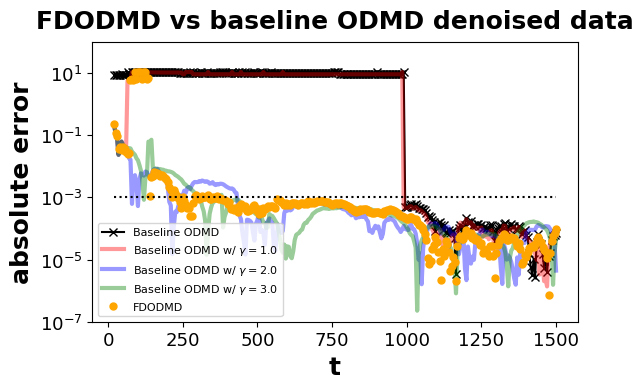

In [8]:
# Load baseline and set time vector
baseline = np.load('./figsdata/Cr2_baseline_odmd_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_real_ODMD.npy')
time = np.arange(20, 1501, 5)

# Define gamma values and load corresponding datasets
gammas = [1.0, 2.0, 3.0]
gamma_data = []  
for gamma in gammas:
    data = np.load(f'./figsdata/Cr2_fourier_denoised_odmd_gamma={gamma}_1_stacked_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_tol=0.1-0.1_real_ODMD.npy')
    gamma_data.append(data[0, :])
gamma_data = np.array(gamma_data)

# Load the stacked data
stacked = np.load('./figsdata/Cr2_fourier_denoised_odmd_6_stacked_noise=0.1_Tmax=1500_overlap=0.2_dt=1.0_tol=0.1-0.1_real_ODMD.npy')
fig, ax = plt.subplots(figsize=(6, 4))

ax.semilogy(time, baseline[2, :],
            marker='x',
            linestyle='-',
            color='black',
            label='Baseline ODMD')

# Choose distinct colors for each gamma curve
colors = ['red', 'blue', 'green']

# Plot each gamma curve with a light alpha value
for idx, gamma in enumerate(gammas):
    ax.semilogy(time, gamma_data[idx, :],
                color=colors[idx],
                alpha=0.4, lw=3,
                label=fr'Baseline ODMD w/ $\gamma = {gamma}$')

# Plot the stacking ODMD curve
ax.semilogy(time, stacked[0, :],
            marker='o',
            linestyle='',
            color='orange', markersize=5,
            label='FDODMD')

# Chemical accuracy
ax.plot([time[0], time[-1]], [1e-3, 1e-3], 'k:')

ax.set_ylim([1e-7, 1e2])
ax.set_xlabel('t', fontsize=18, fontweight='bold')
ax.set_ylabel('absolute error', fontsize=18, fontweight='bold')
ax.set_title('FDODMD vs baseline ODMD denoised data', fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(frameon=True, loc='lower left', fontsize=8)

plt.tight_layout()
#plt.savefig('cr2_only_denoised_odmd_convergence_vs_stacking_and_baseline_styled.pdf', bbox_inches='tight')
plt.show()

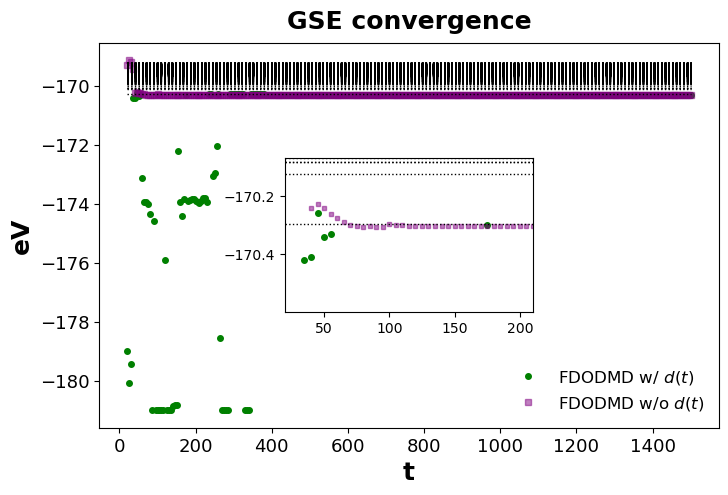

In [9]:
time = np.arange(20, 1501, 5)
fig, ax = plt.subplots(figsize=(8, 5))
markers = ['o', 's', '^', 'D', '*', 'p']


data = np.load('./figsdata/Cr2_fourier_denoised_odmd_6_stacked_denoised_noise=0.8_Tmax=1500_overlap=0.2_dt=1.0_tol=0.5-0.5_real_eigenvalues.npy')[:, 0, 0].imag
ax.plot(time, data, markers[0], label=r'FDODMD w/ $d(t)$', 
     markersize=4, color='green')
extra_filename = './figsdata/Cr2_fourier_denoised_odmd_1_stacked_gamma=3.0_denoised_noise=0.8_Tmax=1500_overlap=0.2_dt=1.0_tol=0.8-0.1_real_eigenvalues.npy'
extra_data = np.load(extra_filename)[:, 1, 0]
ax.plot(time, extra_data, markers[1], label=r'FDODMD w/o $d(t)$', 
     markersize=4, alpha=0.5, color='purple')
# Plot horizontal reference lines for energy levels 
for i in range(950):
    ax.plot([time[0], time[-1]], [E[i], E[i]], 'k:', linewidth=1)


ax.set_xlabel('t', fontsize=18, fontweight='bold')
ax.set_ylabel('eV', fontsize=18, fontweight='bold')
ax.set_title('GSE convergence', fontsize=18, fontweight='bold', pad=10)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(frameon=False, loc='lower right', fontsize=12)

# Create an inset axes (zoomed in on the first ~20 points)
axins = inset_axes(ax, width="40%", height="40%", loc='center')

axins.plot(time, data, markers[0], label=r'FDODMD w/ $d(t)$', 
     markersize=4, color='green')
axins.plot(time, extra_data, markers[1], label=r'FDODMD w/o $d(t)$', 
     markersize=3, color='purple', alpha=0.5)

# Plot reference energies in subplot
for i in range(10):
    axins.plot([time[0], time[-1]], [E[i], E[i]], 'k:', linewidth=1)

axins.set_xlim(time[0], time[38])
axins.set_ylim(E[0] - 0.3, E[4])
axins.tick_params(axis='both', which='major', labelsize=10)
#plt.savefig('cr2_eigenvalue_convergence_FDODMD_with_and_without_noise_stack_styled.pdf', bbox_inches='tight')
#plt.tight_layout()
plt.show()
